<a href="https://colab.research.google.com/github/jalkhudari3/DE_project/blob/main/BikeBuyer_MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BikeBuyerML**

---




* Jana Ghazi 444002015

* Jory Sultan 444005056

* Sulaf Abdullah 444001349

* Arwa Fahad 44411717





**Dataset Overview:**

Bike Buyers Dataset for Exploratory Data Analysis from different backgrounds and whether or not they buy a bike.

This data will be used for prediction models using thr Classification Algorithm.
Number of Features: 13 (including ID,Marital Status,Gender,Income)

**Objective:**

The goal of this project is to predict whether a customer will purchase a bike .

 This is a binary classification problem.

#**Phase 1: Data Wrangling and Exploration with Pandas**




#Part 1: Load and explore a structured dataset

In [ ]:
# Importing libraries
import pandas as pd

In [ ]:
# Loading the selected dataset
url = "https://raw.githubusercontent.com/janaghazi/bikeDataSet/refs/heads/main/bike_buyers.csv"

# reading file and loading it into a dataframe
data_set = pd.read_csv(url)

# Display dataset information
data_set.info()

# Returns the first 5 number of rows.
data_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


#Part 2: Perform data cleaning tasks

**Handle Missing Values**


In [ ]:
print("Columns with null values:")
print(data_set.isnull().sum())

# Remove Rows with missing or null data
data_set = data_set.dropna()

# Check For Missing Data after Removal
print("Check For Missing Data after Removal:")
print("Columns with null values:")
print(data_set.isnull().sum())


Columns with null values:
ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64
Check For Missing Data after Removal:
Columns with null values:
ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64


**Handle Duplicate Data**


In [ ]:
print("Check For Duplicate Data")
print("Duplicate Rows:")
print(data_set.duplicated().sum())

# No Duplicate Data was found, no need to drop data

Check For Duplicate Data
Duplicate Rows:
0


**Identifying the Numerical Columns to detect outlier**

In [ ]:
# Idetinfy numerical columns
numerical_columns = data_set.select_dtypes(include=['number']).columns
# a data frame for only the numerical
print(numerical_columns)

# Removing ID Column from the list because it doesnt contain outliers
numerical_columns = numerical_columns.drop('ID')
print(numerical_columns)

Index(['ID', 'Income', 'Children', 'Cars', 'Age'], dtype='object')
Index(['Income', 'Children', 'Cars', 'Age'], dtype='object')


**Handle Outliers**


In [ ]:
# Method to detect for outliers for each numerical column
def detect_outliers_iqr(data_set, column):
    Q1 = data_set[column].quantile(0.25)
    Q3 = data_set[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_set[(data_set[column] < lower_bound) | (data_set[column] > upper_bound)]
    return outliers

**Clean DataSet from outlier**

In [ ]:
# Passing Numerical Columns to the functuon to detect outliers
for column in numerical_columns:
    outliers = detect_outliers_iqr(data_set, column)
    if not outliers.empty:
      print(f"Outliers were found in {column}")
      # Handling Outliers by dropping them
      data_set  = data_set.drop(outliers.index)
    else:
      print(f"No outliers were found in {column}")

# cleaned Dataset
print(data_set.head())
# printing info
print(data_set.info())

Outliers were found in Income
No outliers were found in Children
Outliers were found in Cars
Outliers were found in Age
      ID Marital Status  Gender   Income  Children        Education  \
0  12496        Married  Female  40000.0       1.0        Bachelors   
1  24107        Married    Male  30000.0       3.0  Partial College   
2  14177        Married    Male  80000.0       5.0  Partial College   
4  25597         Single    Male  30000.0       0.0        Bachelors   
5  13507        Married  Female  10000.0       2.0  Partial College   

       Occupation Home Owner  Cars Commute Distance  Region   Age  \
0  Skilled Manual        Yes   0.0        0-1 Miles  Europe  42.0   
1        Clerical        Yes   1.0        0-1 Miles  Europe  43.0   
2    Professional         No   2.0        2-5 Miles  Europe  60.0   
4        Clerical         No   0.0        0-1 Miles  Europe  36.0   
5          Manual        Yes   0.0        1-2 Miles  Europe  50.0   

  Purchased Bike  
0             No  


#Part 3:  Conduct exploratory data analysis (EDA)

In [ ]:
# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

**Data Visualization**

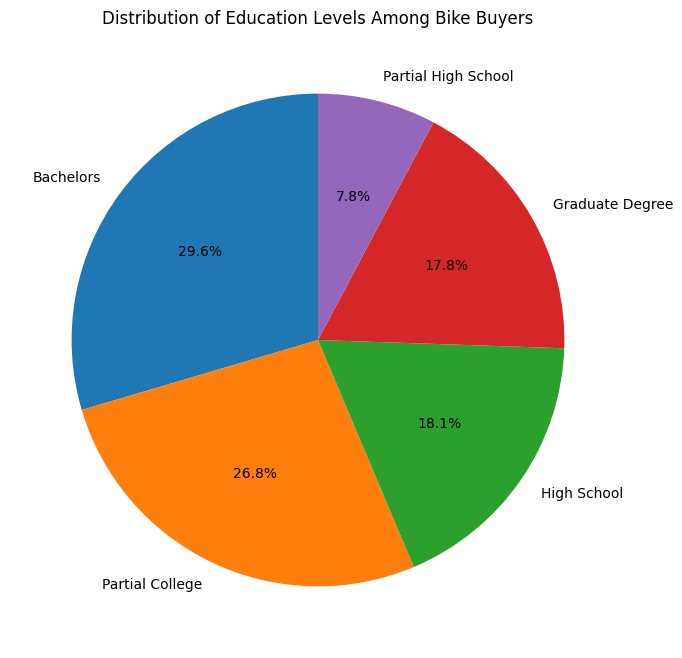

In [ ]:
# Count occurrences of each education level
education_counts = data_set['Education'].value_counts()
# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Education Levels Among Bike Buyers')
plt.show()

***Insight***: Bike buyers span all education levels, but higher education groups (Bachelor’s and Graduate Degree) are predominant.

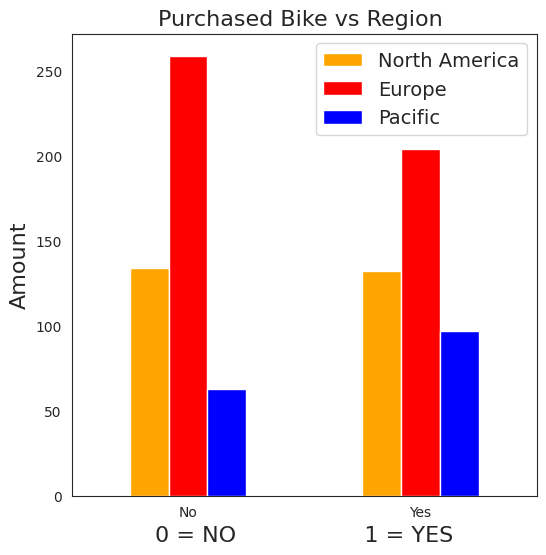

In [ ]:
# Univariate Analysis of data of Categorical data
# Compare Purchased Bike vs age
df = pd.crosstab(data_set['Purchased Bike'],data_set['Region'])

sns.set_style("white")

df.plot(kind="bar",
        figsize=(6,6),
        color=['orange', 'red', "blue"]);

plt.title("Purchased Bike vs Region ", fontsize=16)
plt.xlabel("0 = NO                  1 = YES", fontsize=16)
plt.ylabel("Amount", fontsize=16)
plt.legend(["North America","Europe", "Pacific"], fontsize=14)
plt.xticks(rotation=0)
plt.show()


***Insight***: For example, “Europe” and “Purchased Bike” have a high frequency, that suggests a potential relationship between the region (Europe) and the likelihood of purchasing a bike.

Similarly, we can observe that the frequency of “Europe” is the highest for both “No” and “Yes” categories compared to “North America” and “Pacific,” which may indicate significant trends.

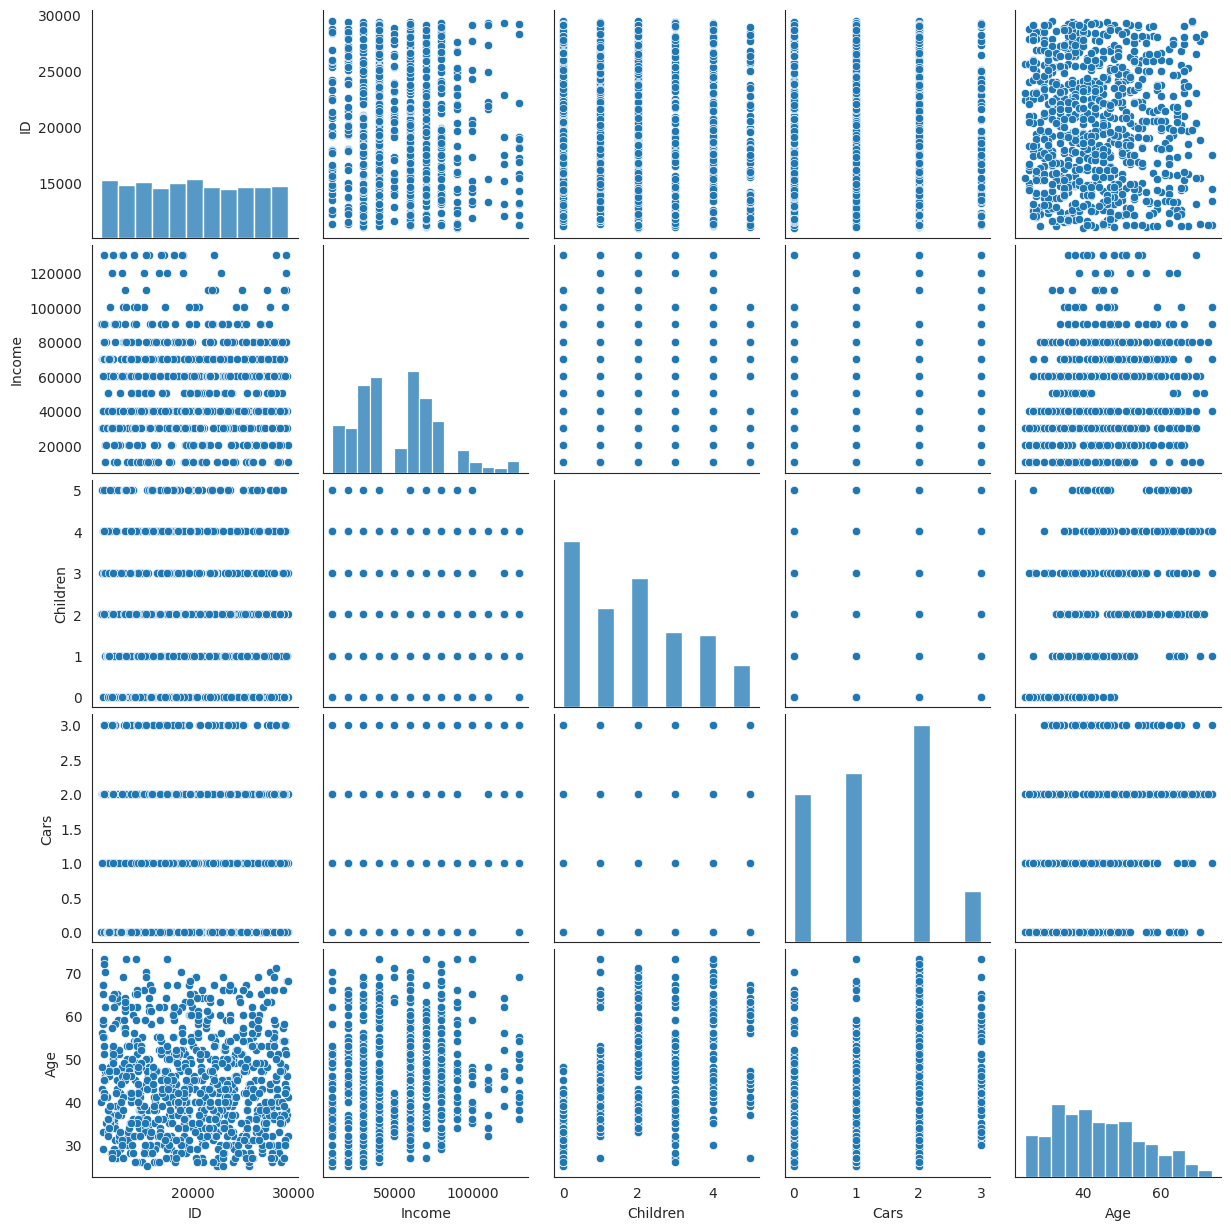

In [ ]:
# Bivariate Analysis of data, to plot multiple pairwise bivariate distributions in a dataset
sns.pairplot(data_set)


***Insight***:


Income:  
Income is positively skewed, with most individuals earning between 20,000 and 70,000.

---

Relationship Between Age and Income:  
Older individuals generally have higher incomes, though some variation exists.

---

Children Count:

The majority of people have 0–2 children, with fewer individuals having 3 or more.

---

Number of Cars:

Most individuals own between 0 and 2 cars, with very few owning 3 cars.

---

 Age Distribution:  
Age is concentrated between 30 and 50, with a gradual decline in older age groups.




**Summary Statistics**

In [ ]:
# getting the statistical summary of dataset
data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,889.0,20067.013498,5344.416737,11000.0,15372.0,19889.0,24745.0,29447.0
Income,889.0,52137.232846,27157.765169,10000.0,30000.0,50000.0,70000.0,130000.0
Children,889.0,1.856018,1.603617,0.0,0.0,2.0,3.0,5.0
Cars,889.0,1.292463,0.943183,0.0,0.0,1.0,2.0,3.0
Age,889.0,44.005624,11.309775,25.0,35.0,43.0,52.0,73.0


#Part 4: Manipulate Data

In [ ]:
# dropping unnecessary column, such as Commute Distance and ID
data_set = data_set.drop(['Commute Distance',"ID"], axis=1)
print("Data set After Deopping Columns")
data_set.info()

Data set After Deopping Columns
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Marital Status  889 non-null    object 
 1   Gender          889 non-null    object 
 2   Income          889 non-null    float64
 3   Children        889 non-null    float64
 4   Education       889 non-null    object 
 5   Occupation      889 non-null    object 
 6   Home Owner      889 non-null    object 
 7   Cars            889 non-null    float64
 8   Region          889 non-null    object 
 9   Age             889 non-null    float64
 10  Purchased Bike  889 non-null    object 
dtypes: float64(4), object(7)
memory usage: 83.3+ KB


# **Phase 2: Numerical Computation with NumPy.**

#Part 2: Calculate Statistical Measure

Mean:
 Income      52137.232846
Children        1.856018
Cars            1.292463
Age            44.005624
dtype: float64
Median:
 [5.0e+04 2.0e+00 1.0e+00 4.3e+01]
Variance:
 Income      7.367146e+08
Children    2.568696e+00
Cars        8.885934e-01
Age         1.277671e+02
dtype: float64
Correlation Matrix:
             Income  Children      Cars       Age
Income    1.000000  0.269272  0.247707  0.180017
Children  0.269272  1.000000  0.279528  0.557130
Cars      0.247707  0.279528  1.000000  0.234209
Age       0.180017  0.557130  0.234209  1.000000


<Axes: >

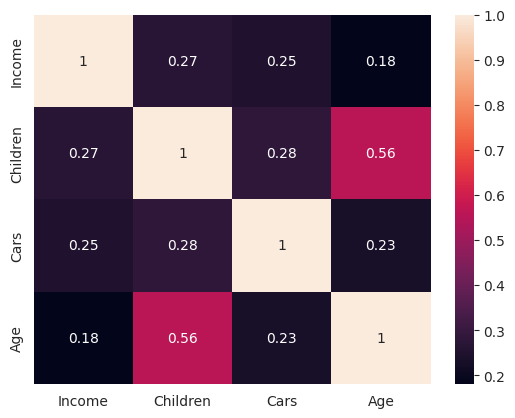

In [ ]:
import numpy as np

numerical_coulmns = data_set.select_dtypes(exclude=['object'])
# Mean for each column
mean_values = np.mean(numerical_coulmns, axis=0)
# Median for each column
median_values = np.median(numerical_coulmns, axis=0)

# Variance for each column
variance_values = np.var(numerical_coulmns, axis=0)
# Correlation matrix between columns
correlation_matrix = numerical_coulmns.corr()

print("Mean:\n", mean_values)
print("Median:\n", median_values)
print("Variance:\n", variance_values)
print("Correlation Matrix:\n", correlation_matrix)

# Heatmap to Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True)


The heatmap visualizes the correlation between numerical features in the dataset:
- **Strong Positive Correlations**:
  Income and Cars, Age and Income.
- **Moderate Positive Correlations**:
  Income and Children, Age and Cars, Cars and Children.
- **Weak Negative Correlations**:
  Age and Children.
- **Weak or No Correlations**:
  Age and Education, Income and Education, Cars and Education, Children and Education.

#**Phase 3: Machine Learning with Scikit-learn**

#Part 1: Preprocess the data using Scikit-learn's tools

**Scaling Numerical Features**

In [ ]:
# Scaling the data using the Min-Max Scaling method using MinMaxScaler from scikit
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select only numerical columns from the dataset
numerical_coulmns = data_set.select_dtypes(exclude=['object'])

scaler = MinMaxScaler()
# Apply Min-Max scaling to the numerical columns
scaled_numerical_columns = scaler.fit_transform(numerical_coulmns)

print("Min-Max Scaled Data:\n", scaled_numerical_columns)

# Convert the scaled data into a DataFrame with the same column names
numerical_df = pd.DataFrame(scaled_numerical_columns, columns=numerical_coulmns.columns)

# no null values found

Min-Max Scaled Data:
 [[0.25       0.2        0.         0.35416667]
 [0.16666667 0.6        0.33333333 0.375     ]
 [0.58333333 1.         0.66666667 0.72916667]
 ...
 [0.5        0.8        0.         0.20833333]
 [0.75       0.6        1.         0.27083333]
 [0.41666667 0.6        0.66666667 0.58333333]]


**Encoding Categorical Features using two diffrenet techniques**
*   **One Hot Encoding**: for categorical features that have multiple values.
*   **Label Encdoing**: for categorical features that have Binary values (only two unique values).



In [ ]:
# dividing the catrgorical columns
categorical_cols = data_set.select_dtypes(exclude=['float']).columns

two_value_cols = []
other_value_cols = []

# Categorize columns based on the number of unique values
for col in categorical_cols:
    if data_set[col].nunique() == 2:
        two_value_cols.append(col)
    else:
        other_value_cols.append(col)

# Categorical columns are now split into two groups:
  # -two_value_cols: Contains columns with only two unique values (Binary)
  # -other_value_cols: Contains columns with more than two unique values (Multi-category)


1.   **Label encoding**: features with two distinct categories.






In [ ]:
from sklearn.preprocessing import LabelEncoder

# Select only binary categorical columns for Label Encoding
encoded_data_Label = data_set[two_value_cols]

for col in encoded_data_Label.columns:
    label_encoder = LabelEncoder()
    x_temp = label_encoder.fit_transform(encoded_data_Label[col])
    # to avoid a warning
    encoded_data_Label.loc[:, col] = x_temp  # Using .loc for assignment

2.   **One-hot encoding:** features with more than two categories.




In [ ]:
# Select multi-category categorical columns for One-Hot Encoding
encoded_data_oneHot = data_set[other_value_cols]

encoded_data_oneHot = pd.get_dummies(encoded_data_oneHot, columns=encoded_data_oneHot.columns)
# no null values found

**Merging all the columns into a final data frame, after scaling and encoding**

In [ ]:
# Merge encoded categorical features
encoded_categorical_data = pd.concat([encoded_data_Label, encoded_data_oneHot], axis=1)

# Reset index to ensure consistency after merging
df1 = numerical_df.reset_index(drop=True)
df2 = encoded_categorical_data.reset_index(drop=True)

# Combine numerical and encoded categorical data into the final DataFrame
df_final = pd.concat([df1, df2], axis=1)

# Display information about the final dataset
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Income                         889 non-null    float64
 1   Children                       889 non-null    float64
 2   Cars                           889 non-null    float64
 3   Age                            889 non-null    float64
 4   Marital Status                 889 non-null    object 
 5   Gender                         889 non-null    object 
 6   Home Owner                     889 non-null    object 
 7   Purchased Bike                 889 non-null    object 
 8   Education_Bachelors            889 non-null    bool   
 9   Education_Graduate Degree      889 non-null    bool   
 10  Education_High School          889 non-null    bool   
 11  Education_Partial College      889 non-null    bool   
 12  Education_Partial High School  889 non-null    boo

#Part 2: Build and evaluate machine learning models

**Using supervised learning with the classification Algorithm**

**Two Models will be evaluated and compared:**
*   Logistics Regression
*   Random Forest Classifier



1.   **Logistic Regression**

In [ ]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Separate features (dataWithNoTarget) and target variable (dataWithTarget)
dataWithNoTarget = df_final.drop("Purchased Bike", axis=1) #X
dataWithTarget = df_final['Purchased Bike'].astype(int) #Y


# Split the dataset into training and testing sets (80% train, 20% test)
dataWithNoTarget_train, dataWithNoTarget_test, dataWithTarget_train, dataWithTarget_test = train_test_split(dataWithNoTarget, dataWithTarget, test_size = 0.20, random_state = 5)

model1 = LogisticRegression(random_state=0)
model1.fit(dataWithNoTarget_train, dataWithTarget_train)


# Make predictions on the dataWithTarget test
dataWithTarget_pred = model1.predict(dataWithNoTarget_test)

# Calculate Evaluation Metrics
model1_accuracy = accuracy_score(dataWithTarget_test, dataWithTarget_pred)
model1_precision = precision_score(dataWithTarget_test, dataWithTarget_pred)
model1_recall = recall_score(dataWithTarget_test, dataWithTarget_pred)
model1_f1 = f1_score(dataWithTarget_test, dataWithTarget_pred)

# Printing Results
results = pd.DataFrame([['Logistic Regression', model1_accuracy, model1_precision, model1_recall, model1_f1]],
         columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(results)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.589888   0.588235  0.568182  0.578035


2.   **Random Forest**

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier()
model2.fit(dataWithNoTarget_train, dataWithTarget_train)

# 1. Make predictions
dataWithNoTarget_pred = model2.predict(dataWithNoTarget_test)
# 2. Predicted probabilities for the positive class
dataWithNoTarget_prob = model2.predict_proba(dataWithNoTarget_test)[:, 1]

# Calculate Evaluation Metrics
model2_accuracy = accuracy_score(dataWithTarget_test, dataWithNoTarget_pred)
model2_precision = precision_score(dataWithTarget_test, dataWithNoTarget_pred)
model2_recall = recall_score(dataWithTarget_test, dataWithNoTarget_pred)
model2_f1 = f1_score(dataWithTarget_test, dataWithNoTarget_pred)

# Printing Results
results = pd.DataFrame([['Random Forest Classifier', model2_accuracy ,model2_precision, model2_recall, model2_f1]],
         columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)


                      Model  Accuracy  Precision  Recall  F1 Score
0  Random Forest Classifier  0.668539   0.679012   0.625  0.650888


#Part 3: Optimize models using Cross Validation

**The Cross-Validation technique to optimize the Logistic Regression Model**

 *Why do we use Cross-Validation?*

• Because it reduces bias in model evaluation, especially when the data is small.

In [ ]:
# Optimization
from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_scores = cross_val_score(model1, dataWithNoTarget, dataWithTarget, cv=5, scoring='accuracy')
# list of accuracy scores for each fold.
print("Cross-validation accuracy scores for each fold:", cv_scores)
# The average accuracy across all folds.
print("Cross-validation accuracy:", cv_scores.mean())


Cross-validation accuracy scores for each fold: [0.58426966 0.59550562 0.6011236  0.61797753 0.66101695]
Cross-validation accuracy: 0.6119786707293848




> We can observe that after using the Cross Validation on the logistic regression, that the accuracy of the model has enhanced which means that it has been enhanced and the optimization has been succesfull.



#Part 4: Visualize results and evaluate performance using metrics

Evaluating the performances of each model:

*   Logistic Regression:

*   Random Forest:


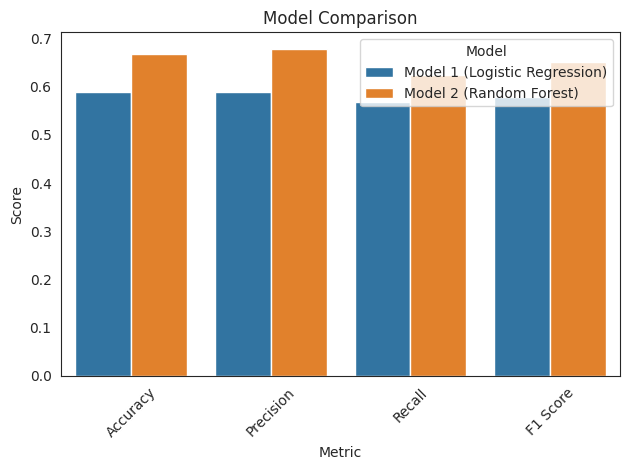

In [ ]:
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Model 1 (Logistic Regression)': [model1_accuracy, model1_precision, model1_recall, model1_f1],
    'Model 2 (Random Forest)': [model2_accuracy, model2_precision, model2_recall, model2_f1]
}

# Create the cross-tab
cross_tab = pd.DataFrame(data)

# Visualize the Cross tab
cross_tab_melted = pd.melt(cross_tab, id_vars=['Metric'], var_name='Model', value_name='Score')
sns.barplot(x='Metric', y='Score', hue='Model', data=cross_tab_melted)
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()